## Biblioteca

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics

## Analise de dados

Usamos o data_4__.cvs por que ele me da uma propoção mensal de vendas de produtos.

In [2]:
df_4 = pd.read_csv('data_4__.csv')
df_4.describe()

,YearMonth,Volume
count,60.000000,60.000000
mean,201506.500000,2587.558112
std,142.657288,6559.869315
min,201301.000000,8.085200
25%,201403.750000,14.590500
50%,201506.500000,20.022000
75%,201609.250000,31.140600
max,201712.000000,28071.000000


In [3]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
Srore_id      60 non-null object
Product id    60 non-null object
YearMonth     60 non-null int64
Volume        60 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ KB


In [4]:
# Ordenaão de valores
df_4 = df_4.sort_values('YearMonth')

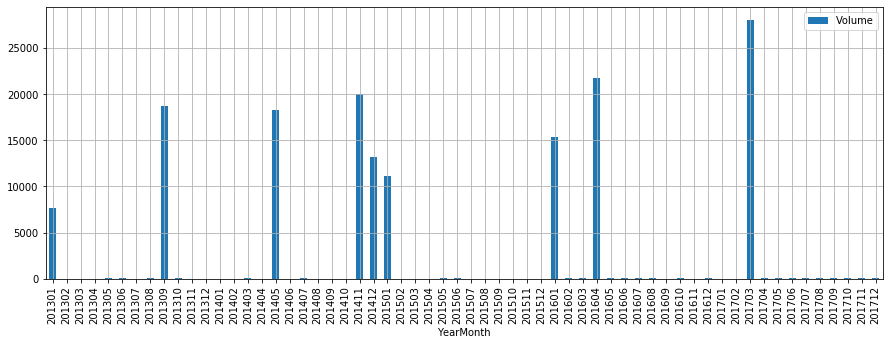

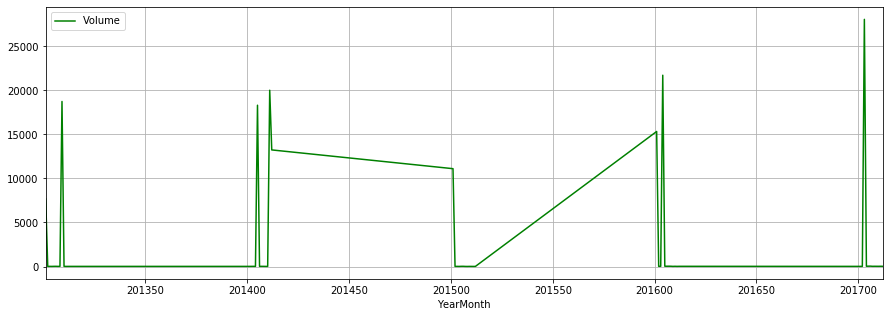

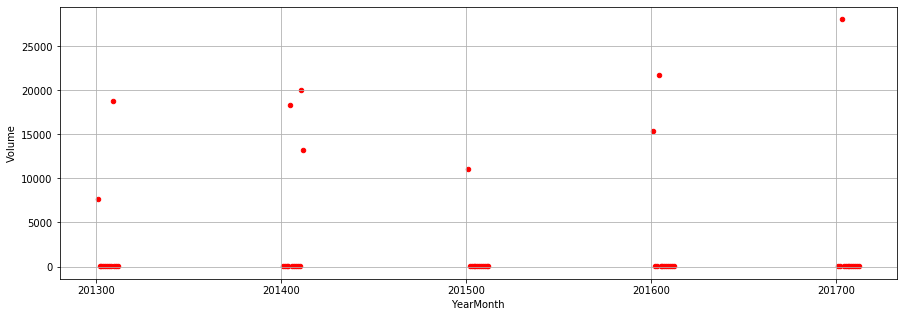

In [5]:
#Plotando graficos
plt.rcParams['figure.figsize'] = (15,5)
df_4.plot(kind='bar',x='YearMonth',y='Volume');
plt.grid()
df_4.plot(kind='line',x='YearMonth',y='Volume',c='green');
plt.grid()
df_4.plot(kind='scatter',x='YearMonth',y='Volume',c='red');
plt.grid()

In [6]:
# Pegando o ultimo més
last_morth = max(df_4.values[:,2])
# Pegando o ultimo valor
last_volum = df_4.values[-1,-1]

print('Ultimo mes: ',last_morth,' Volume: ',last_volum)

Ultimo mes:  201712  Volume:  22.0668


In [7]:
df_4.tail()

,Srore_id,Product id,YearMonth,Volume
54,DM-01,pd_1,201708,27.3492
59,DM-01,pd_1,201709,25.2192
9,DM-01,pd_1,201710,23.9412
14,DM-01,pd_1,201711,28.2012
19,DM-01,pd_1,201712,22.0668


In [8]:
#df_4 = df_4.drop(19)
#df_4.shape

In [9]:
colun = ['YearMonth', 'Volume']

df_4 = pd.DataFrame(df_4.values[:-1,2:],columns=colun)
df_4.head()

,YearMonth,Volume
0,201301,7668
1,201302,10.3092
2,201303,16.5288
3,201304,13.3764
4,201305,20.2776


## Modelo

In [10]:
model = LinearRegression()

In [11]:
X = pd.DataFrame(df_4['YearMonth'])
y = pd.DataFrame(df_4['Volume'])

In [12]:
X.head()

,YearMonth
0,201301
1,201302
2,201303
3,201304
4,201305


In [13]:
print('y_pred: ', last_volum,' : ', y.mean())

y_pred:  22.0668  :  Volume    2631.041015
dtype: float64


In [14]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
model.predict([[last_morth]])

array([[2503.97503045]])

In [24]:
y_pred = model.predict([[last_morth]])
y_test= [last_volum]

print(y_pred)
print(y_test)

[[2503.97503045]]
[22.0668]


In [26]:
print('MAE:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred))  
print('MSE:', metrics.mean_squared_error(y_test, y_pred))  
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 2481.9082304542976
MSE: 6159868.464396783
RMSE: 2481.9082304542976
